In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
config = {
    "base_dir":        "/eos/home-b/bpinolin/ML_output/",
    "plot_config":     "VBSOS",
    "cut":             "sr",
    "samples_version": "mjj_v7/highZ",
    "cols": [
             'detajj',
             'ptll',
             'detall',        
             'jetpt1', 
             'jetpt2', 
             'met',
             'dphill',
             'dphijj',
             'Mll',
             'btag_central',
             'btag_forward',
             'dR_jl1',
             'dR_jl2',
             'Zeppll',
             'mjj',
             'Zepp1',
             'Zepp2',
             'eta1',
             'eta2',
             'qgl_forward',
             'qgl_central',
            ],
}

In [3]:
ye = "2018"

In [4]:
import os

config_base_dir = os.path.join(config["base_dir"], config["plot_config"])
# load numpy
samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
file_sig_bal = os.path.join(samples_dir, "for_training_"+ye+"/signal_balanced.pkl")
file_bkg_bal = os.path.join(samples_dir, "for_training_"+ye+"/background_balanced.pkl")

In [5]:
import pickle
signal = pickle.load(open(file_sig_bal, "rb"))
bkg = pickle.load(open(file_bkg_bal, "rb"))

In [6]:
bkg = bkg.dropna()
signal = signal.dropna()

## Comparing train and test

## Plotting weights

fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(bkg["puWeight"], bins=100, histtype="step", density=True, label="top", color='blue')
plt.title("puWeight Background with 0-weight events")
plt.show()

## Check weights Wnn

## Plotting all variables

## Extracting mjj for ROC

In [7]:
signal = signal[(signal['mjj'] >= 500) & (signal["detajj"] >= 3.5)]
bkg = bkg[(bkg['mjj'] >= 500) & (bkg["detajj"] >= 3.5)]

#v6 

sig_tot = 51435
bkg_tot = 1733357

eS = round(len(signal)/sig_tot,3)
eB = round(len(bkg)/bkg_tot,3)

print("Queste percentuali vengono utilizzate per la ROC di mjj")
print("% signal = ", eS)
print("% bkg = ", eB)



In [8]:
# v7 
low_sig = 24035
low_bkg = 117863
high_sig = 9944
high_bkg = 91882

low_sig_2016 = 2257
low_bkg_2016 = 62870
low_sig_2017 = 11050
low_bkg_2017 = 8435
low_sig_2018 = 10728
low_bkg_2018 = 46558

high_sig_2016 = 901
high_bkg_2016 = 48379
high_sig_2017 = 4582
high_bkg_2017 = 7306
high_sig_2018 = 4461
high_bkg_2018 = 36197

In [9]:
eS = round(len(signal)/high_sig_2018,3)
eB = round(len(bkg)/high_bkg_2018,3)

print("Queste percentuali vengono utilizzate per la ROC di mjj")
print("% signal = ", eS)
print("% bkg = ", eB)

Queste percentuali vengono utilizzate per la ROC di mjj
% signal =  0.441
% bkg =  0.118


In [10]:
bins = 26

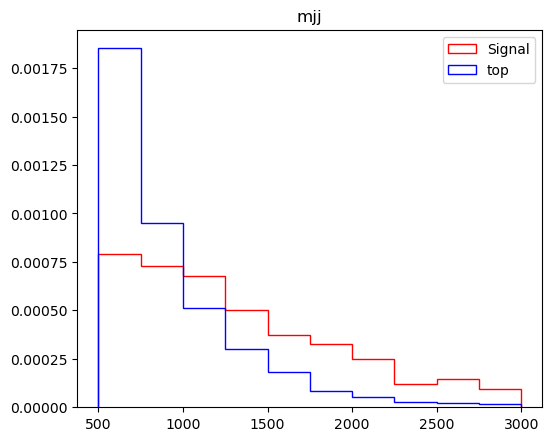

In [11]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(signal["mjj"], bins=10, histtype="step", label="Signal", color='red', density = True, range=(500,3000))
_ = plt.hist(bkg["mjj"], bins=10, histtype="step", label="top", color='blue', density = True, range=(500,3000))
plt.legend()
plt.title("mjj")
plt.show()

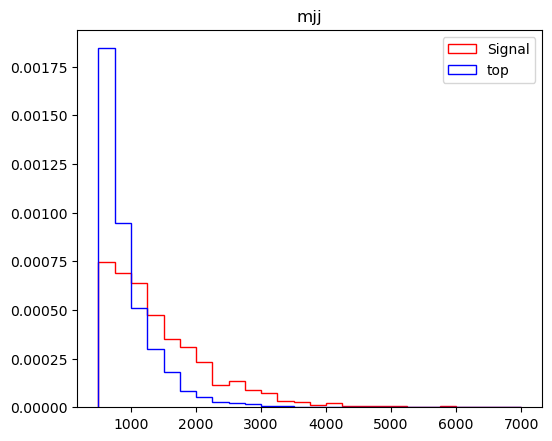

In [12]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(signal["mjj"], bins=bins, histtype="step", label="Signal", color='red', density = True, range=(500,7000))
_ = plt.hist(bkg["mjj"], bins=bins, histtype="step", label="top", color='blue', density = True, range=(500,7000))
plt.legend()
plt.title("mjj")
plt.show()

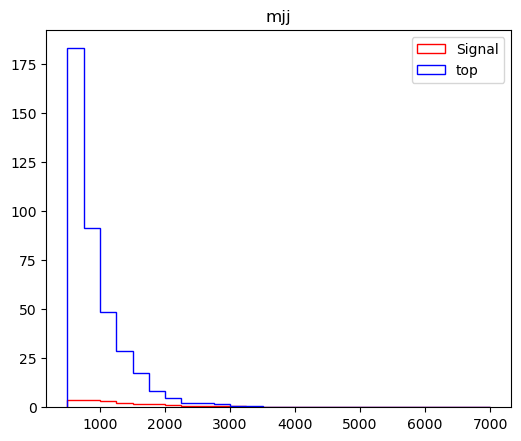

In [13]:
fig = plt.figure(figsize=(6,5), dpi=100)
n_sig, b, _ = plt.hist(signal["mjj"], bins=bins, histtype="step", weights=signal["weight_"], label="Signal", color='red', range=(500,7000))
n_bkg, b, _ = plt.hist(bkg["mjj"], bins=bins, histtype="step", weights=bkg["weight_"], label="top", color='blue', range=(500,7000))
plt.legend()
plt.title("mjj")
plt.show()

In [14]:
s_n = 0 
for i in range (10,26):
    s_n = n_sig[i]+s_n
n_sig[9] = n_sig[9]+s_n
n_sig = n_sig[0:10]

In [15]:
b_n = 0 
for i in range (10,26):
    b_n = n_bkg[i]+b_n
n_bkg[9] = n_bkg[9]+b_n
n_bkg = n_bkg[0:10]

In [16]:
effS = np.array([])
effB = np.array([])

for i in range(len(n_sig)):
    i = i+1
    S = sum(n_sig[-i:len(n_sig)])
    effS = np.append(effS, S/sum(n_sig))
    
for j in range(len(n_bkg)):
    j = j+1
    B = sum(n_bkg[-j:len(n_bkg)])
    effB = np.append(effB, B/sum(n_bkg))

In [17]:
# Considero efficienza di segnale e fondo delle selezioni
import numpy as np

new_effS = np.array([])
new_effB = np.array([])

for i in range (len(effS)):
    add = effS[i]*eS
    new_effS = np.append(new_effS, add)

for i in range (len(effB)):
    add = effB[i]*eB
    new_effB = np.append(new_effB, add)

In [18]:
print(new_effS.tolist())
print(new_effB.tolist())

[0.0340792876588319, 0.05002357780465735, 0.06340670238977562, 0.0897102026676778, 0.12380841055718458, 0.1631812074565937, 0.21454378228086488, 0.2839574220418111, 0.361440289640627, 0.441]
[0.0009966453819907053, 0.0016485309563382883, 0.002336394421737882, 0.0037495174065071187, 0.006325236369068179, 0.011544500257885299, 0.020208001145836218, 0.03493040976849165, 0.06259881478771019, 0.118]


In [19]:
#lowZ
effS = [0.040736472838376614, 0.05592562623469381, 0.07529862873688523, 0.10234279953073973, 0.13693768198893794, 0.18217557243460117, 0.23630815018365495, 0.30505888526302605, 0.3819601920044726, 0.454]
effB = [0.001075247949232022, 0.0015620747593655096, 0.002264210950241044, 0.0031539771722153493, 0.004669219640331847, 0.007975161961550653, 0.013339413847672394, 0.023428039433529148, 0.04283398824289765, 0.085]

In [20]:
#highZ
effS = [0, 0.03479523631328408, 0.04869692682234104, 0.06424209753284536, 0.09000961687265412, 0.1225713588821826, 0.16453253671610635, 0.21817307288143747, 0.28825310983642677, 0.3709494388387954, 0.453]
effB = [0, 0.0006909014245792193, 0.0011881134640089048, 0.0017806344125014413, 0.0030796128289360142, 0.0050430705116278705, 0.00987160689445902, 0.019265550843253657, 0.03417609550930723, 0.061353772346771494, 0.118]

In [21]:
#lowZ_2016
effS = [0, 0.04073459170740681, 0.05710113542555851, 0.07613402052124975, 0.09798413668847471, 0.13778335892434188, 0.18606329549405073, 0.2389362851366623, 0.3124086021752812, 0.3980387511444776, 0.474]
effB = [0, 0.0009646524417219953, 0.0015044727935291096, 0.0021702838626095748, 0.0030014821573354764, 0.004834352741713671, 0.007740799873624115, 0.012998052288319318, 0.02193276516729728, 0.04125777504581491, 0.082]

In [22]:
#lowZ_2017
effS = [0, 0.0345532238342732, 0.04690953444688321, 0.06552355749390308, 0.09233668706236772, 0.12577057797848304, 0.17004879626641253, 0.2260985021929782, 0.29564366693092814, 0.37608694241556506, 0.453]
effB = [0, 0.0014468728869540574, 0.001989029874749897, 0.0029713063490725707, 0.0037165596753267896, 0.005187022603619501, 0.009437853020820682, 0.015051409654965342, 0.027085145054930405, 0.04797114049059617, 0.096]

In [23]:
#lowZ_2018
effS = [0, 0.044851511352654264, 0.061403111183579155, 0.08156960435053123, 0.11117737918709028, 0.14467043378299185, 0.1896896064115783, 0.24375413416548064, 0.3107854347428993, 0.382752539357105, 0.451]
effB = [0, 0.0010047672747616606, 0.0014776974629195506, 0.002085638806448078, 0.003217712486019244, 0.004751624200330773, 0.008016822765273202, 0.013899354462467374, 0.024489639471684355, 0.045176368703367435, 0.089]

In [24]:
#highZ_2016
effS = [0, 0.03750581172848121, 0.04694916807938441, 0.06557749542055273, 0.09090875360571196, 0.12109668052587204, 0.16561400059043307, 0.21895084412831, 0.28428614305680316, 0.38003767367452745, 0.469]
effB = [0, 0.0006481525942471852, 0.0011017388265213367, 0.001832315535591636, 0.0032407622054924255, 0.005608318562376584, 0.010623218235661586, 0.018898220400150878, 0.033105814456889336, 0.061618066678400536, 0.118]

In [25]:
#highZ_2017
effS = [0, 0.03419320737147321, 0.04765873528610692, 0.06471545906559502, 0.08988703727965194, 0.12147984976655476, 0.16597835143317763, 0.22349969061721264, 0.29771258038786963, 0.3804019815171224, 0.462]
effB = [0, 0.00033842017629959014, 0.0006729940466291922, 0.0010477024110872935, 0.0021256931682145865, 0.0030342763632688406, 0.0072405963203804645, 0.018346919678604565, 0.033994112082928865, 0.05960597050499501, 0.118]

In [26]:
#highZ_2018
effS = [0, 0.0340792876588319, 0.05002357780465735, 0.06340670238977562, 0.0897102026676778, 0.12380841055718458, 0.1631812074565937, 0.21454378228086488, 0.2839574220418111, 0.361440289640627, 0.441]
effB = [0, 0.0009966453819907053, 0.0016485309563382883, 0.002336394421737882, 0.0037495174065071187, 0.006325236369068179, 0.011544500257885299, 0.020208001145836218, 0.03493040976849165, 0.06259881478771019, 0.118]

In [27]:
#loose_highZ_v6
effS = [0.005833038446435099, 0.008721293796773017, 0.011650806761574352, 0.01664890135125221, 0.022899812915647667, 0.03076327166080431, 0.042458057098190116, 0.05673653619027725, 0.07442631981310047, 0.093]
effB = [3.7459287019305e-05, 6.648439084312007e-05, 0.00010834895276814026, 0.00017534211085604967, 0.0002983938504988536, 0.0005998124242305254, 0.001038762860234798, 0.0017248107243469253, 0.0032129149399471014, 0.006]

In [28]:
#loose_lowZ_v6
effS = [0.017641963851241026, 0.024306848986602788, 0.03292895992210296, 0.04600748957769348, 0.061723765160101945, 0.0832576891185893, 0.11126097142921929, 0.14591573776311473, 0.1845723948378583, 0.222]
effB = [5.7822175904867295e-05, 8.63281516447751e-05, 0.0001264453488047206, 0.00019671040643474963, 0.00030328983596466716, 0.0005426713654973182, 0.0009067261879144509, 0.0016212367755612572, 0.003048036812689291, 0.006]